In [4]:
#######################################################################
# Regression 1
#######################################################################

In [30]:
library(tidyverse)   # For data manipulation and visualization
library(openintro)   # Contains the HFI dataset
library(broom)       # For tidy model outputs

# EXPLANATION:
#  tidyverse: Provides ggplot2 for visualization and dplyr for data wrangling
# openintro: Contains the hfi dataset we'll analyze
# broom: Helps extract tidy summaries from model objects


In [34]:
## Load and Prepare Data
data(hfi)  # Load Human Freedom Index dataset


In [35]:
# Filter for 2016 data and select key variables
hfi_2016 <- hfi %>%
  filter(year == 2016) %>%
  select(pf_score, pf_expression_control, hf_score) 
#pf_score → Personal Freedom Score
#pf_expression_control → A measure of freedom of expression/control
#hf_score → Human Freedom Score

In [11]:
hfi_2016

pf_score,pf_expression_control,hf_score
<dbl>,<dbl>,<dbl>
7.596281,5.25,7.568140
5.281772,4.00,5.135886
6.111324,2.50,5.640662
8.099696,5.50,6.469848
6.912804,4.25,7.241402
9.184438,7.75,8.582219
9.246948,8.00,8.413474
5.676553,0.25,6.083277
7.454538,7.25,7.397269


In [37]:
# EXPLANATION:
# - filter(): Subsets rows to only keep observations from 2016
# - select(): Chooses specific columns to work with
# - %>% (pipe): Chains operations together sequentially

## Initial Data Exploration
# View dataset dimensions and structure
dim(hfi_2016)    # Shows number of rows and columns


[1] 162   3

In [38]:
str(hfi_2016)    # Displays variable types and sample values

tibble [162 × 3] (S3: tbl_df/tbl/data.frame)
 $ pf_score             : num [1:162] 7.6 5.28 6.11 8.1 6.91 ...
 $ pf_expression_control: num [1:162] 5.25 4 2.5 5.5 4.25 7.75 8 0.25 7.25 0.75 ...
 $ hf_score             : num [1:162] 7.57 5.14 5.64 6.47 7.24 ...
 - attr(*, "spec")=
  .. cols(
  ..   year = col_double(),
  ..   ISO_code = col_character(),
  ..   countries = col_character(),
  ..   region = col_character(),
  ..   pf_rol_procedural = col_double(),
  ..   pf_rol_civil = col_double(),
  ..   pf_rol_criminal = col_double(),
  ..   pf_rol = col_double(),
  ..   pf_ss_homicide = col_double(),
  ..   pf_ss_disappearances_disap = col_double(),
  ..   pf_ss_disappearances_violent = col_double(),
  ..   pf_ss_disappearances_organized = col_double(),
  ..   pf_ss_disappearances_fatalities = col_double(),
  ..   pf_ss_disappearances_injuries = col_double(),
  ..   pf_ss_disappearances = col_double(),
  ..   pf_ss_women_fgm = col_double(),
  ..   pf_ss_women_missing = col_double(),
  

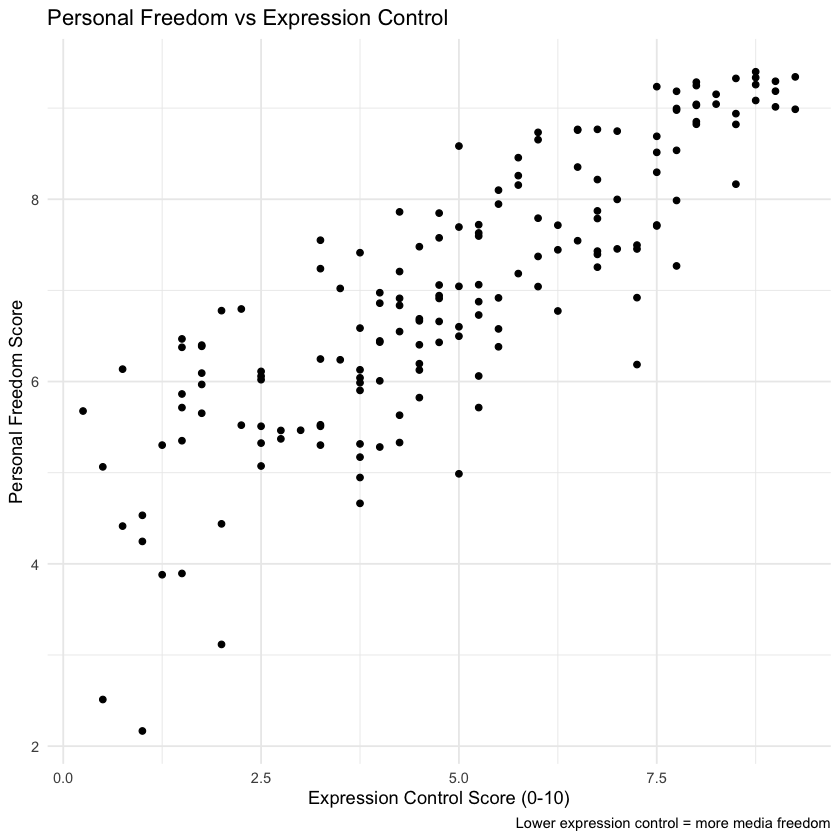

In [134]:
## Visualizing the Relationship
# Scatterplot of personal freedom vs expression control
ggplot(hfi_2016, aes(x = pf_expression_control, y = pf_score)) +
  geom_point() +
  labs(title = "Personal Freedom vs Expression Control",
       x = "Expression Control Score (0-10)",
       y = "Personal Freedom Score",
       caption = "Lower expression control = more media freedom") +
  theme_minimal()
# EXPLANATION:
# - ggplot(): Initializes plot with data and aesthetic mappings
# - geom_point(): Creates scatterplot points
# - labs(): Adds titles and labels
# - theme_minimal(): Applies a clean visual style

In [44]:
## Correlation Analysis
# Calculate correlation coefficient
correlation <- hfi_2016 %>%
  summarize(cor = cor(pf_expression_control, pf_score, 
                      use = "complete.obs"))
# EXPLANATION:
#  cor(): Computes Pearson's correlation coefficient (-1 to 1)
# use="complete.obs": Only uses rows with no missing values
# summarisz(): Creates a summary statistic

In [43]:
correlation

cor
<dbl>
0.8450646


In [58]:
## Fitting a Linear Model
# Fit linear regression model
model1 <- lm(pf_score ~ pf_expression_control, data = hfi_2016)
tidy_model1 <- tidy(model1)
tidy_model1
# EXPLANATION:
# running a simple linear regression
# - lm(): Fits linear regression model using least squares
# - y ~ x formula specifies response and predictor
# - tidy(): Extracts coefficients in a clean data frame

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.2838153,0.14897525,28.75521,4.228325e-65
pf_expression_control,0.5418452,0.02710231,19.99258,2.313214e-45


interpretation: 

- Intercept (4.28): When pf_expression_control = 0, the predicted pf_score is 4.28.

- Slope (0.54): For every 1-unit increase in pf_expression_control, the pf_score increases by 0.54 points, on average.

===> The linear model shows that higher expression control scores are strongly and significantly associated with higher personal freedom scores, with an estimated increase of 0.54 in pf_score for each unit increase in pf_expression_control.

In [60]:
## Model Summary
glance_model1 <- glance(model1)
glance_model1

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7141342,0.7123476,0.7992708,399.7033,2.313214e-45,1,-192.5648,391.1297,400.3925,102.2134,160,162


Output Breakdown:

- r.squared: value is 0.7141. Meaning: About 71.4% of the variation in pf_score is explained by pf_expression_control==> Strong explanatory power.

- adj.r.squared: value is 0.7123. Meaning: Adjusted for model complexity (only slightly lower here since it is a simple model.
- p.value: Extremely significant overall- strong evidence that the predictor improves the model.

In [66]:
## Making Predictions
# Create new data for prediction
new_data <- data.frame(pf_expression_control = c(3, 5, 7))
new_data

#Explanation: 
#We created a new data frame with three values of pf_expression_control: 3, 5, and 7 
#==> these are the values we want to predict pf_score for.

pf_expression_control
<dbl>
3
5
7


In [67]:
# Generate predictions
predictions <- predict(model1, newdata = new_data)

In [69]:
predictions #These predictions come from the regression equation we had earlier

1        2        3 
5.909351 6.993041 8.076732

Interpretation:
	•	A country with a lower expression score (e.g., 3) is predicted to have a personal freedom score of approximately 5.91.
	•	A country with a higher expression score (e.g., 7) is predicted to have a personal freedom score of approximately 8.08.

This confirms a positive relationship: as freedom of expression increases, so does the overall personal freedom score, according to the model.

The regression model indicates a strong and statistically significant association between freedom of expression and personal freedom. Countries with higher expression scores—representing less political control over media—tend to also enjoy greater personal freedom overall.

In [74]:
#Notes on our last lecture 

In [78]:
# Load required packages
library(tidyverse)  # For data manipulation and visualization
library(broom)      # For tidy model outputs


In [84]:
# Creating a dataset that represents high school graduation rates and poverty levels
# for a selection of 10 U.S. states. The data is based on approximate values from
# a scatterplot presented on slide 3 (lecture).

education_data <- data.frame(
  
  # State abbreviations: a character vector identifying each U.S. state in the dataset.
  state = c("AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL"),

  hs_grad = c(80, 85, 82, 81, 84, 90, 89, 86, 87, 83),
  # For example, Colorado (CO) has a graduation rate of 90%, and Alabama (AL) has 80%.
  
  poverty = c(18, 10, 16, 17, 14, 8, 9, 16, 11, 15)
  # For example, Alabama (AL) has a poverty rate of 18%, and Colorado (CO) has 8%.
)



In [85]:
education_data

state,hs_grad,poverty
<chr>,<dbl>,<dbl>
AL,80,18
AK,85,10
AZ,82,16
AR,81,17
CA,84,14
CO,90,8
CT,89,9
DC,86,16
DE,87,11


In [83]:
# Calculate basic statistics 
stats_summary <- education_data %>%
  summarize(
    mean_hs = mean(hs_grad),
    sd_hs = sd(hs_grad),
    mean_poverty = mean(poverty),
    sd_poverty = sd(poverty)
  )

In [86]:
stats_summary

mean_hs,sd_hs,mean_poverty,sd_poverty
<dbl>,<dbl>,<dbl>,<dbl>
84.7,3.335,13.4,3.596294


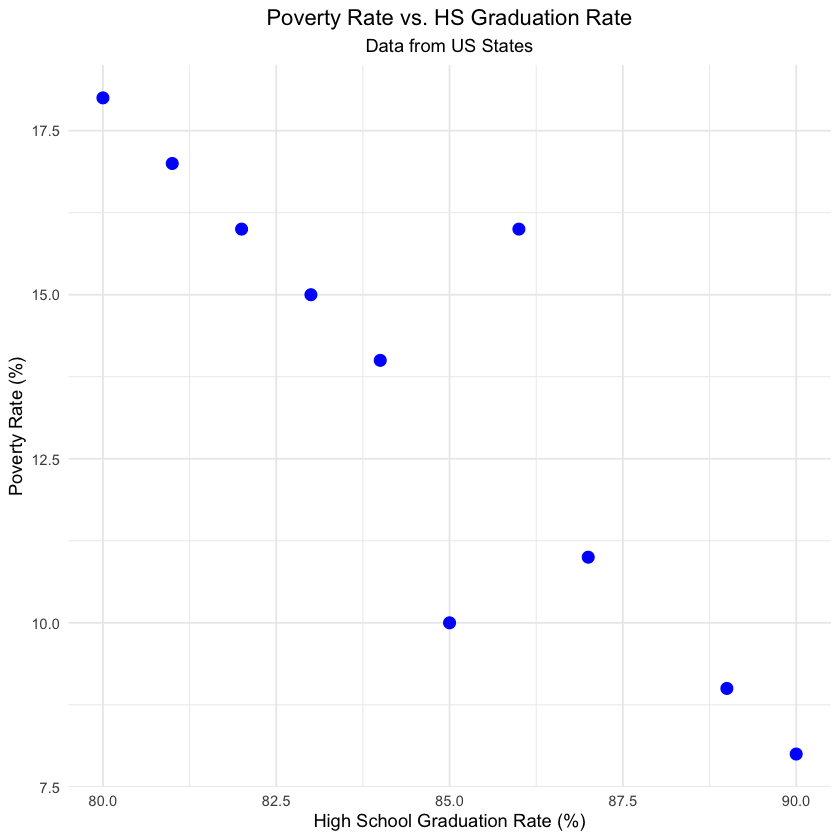

In [89]:
# Create scatterplot 
ggplot(education_data, aes(x = hs_grad, y = poverty)) +
  geom_point(size = 3, color = "blue") +
  labs(title = "Poverty Rate vs. HS Graduation Rate",
       subtitle = "Data from US States",
       x = "High School Graduation Rate (%)",
       y = "Poverty Rate (%)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5))

There is a clear downward trend in the points.

- As high school graduation rate increases, the poverty rate decreases.

- This suggests a negative correlation (or inverse relationship) between education and poverty
States with higher graduation rates tend to have lower poverty rates, and vice versa.


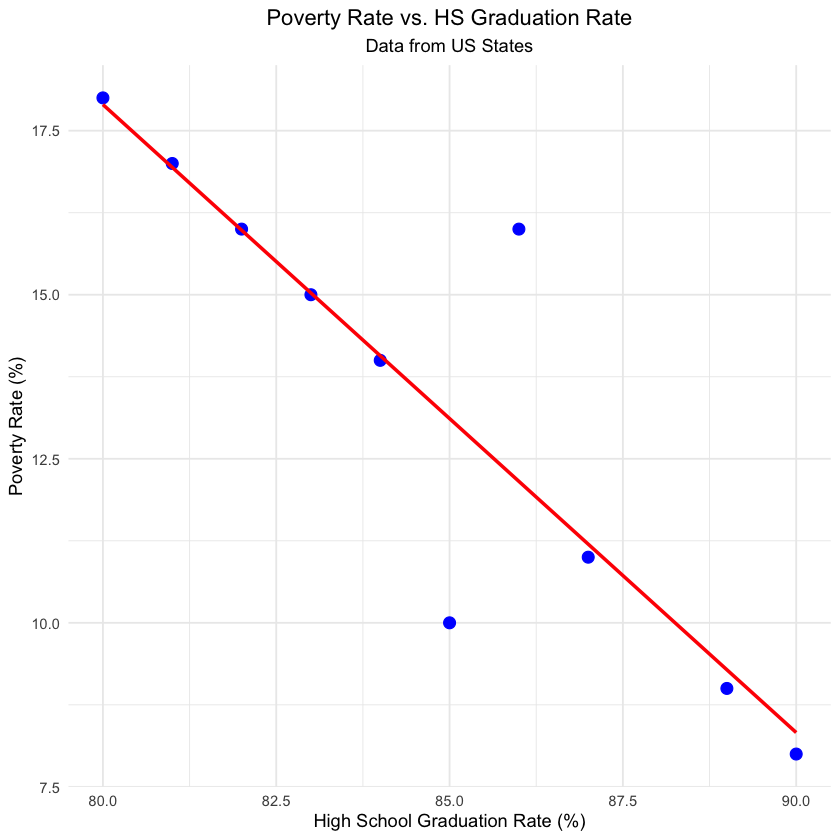

In [93]:
# we can fit a line there
ggplot(education_data, aes(x = hs_grad, y = poverty)) +
  geom_point(size = 3, color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "red") + 
  labs(
    title = "Poverty Rate vs. HS Graduation Rate",
    subtitle = "Data from US States",
    x = "High School Graduation Rate (%)",
    y = "Poverty Rate (%)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5)
  )

In [96]:
### CORRELATION ANALYSIS ###################################

In [97]:
# Calculate covariance 
cov_result <- cov(education_data$hs_grad, education_data$poverty)

In [98]:
cov_result

[1] -10.64444

In [99]:
# Calculate correlation 
cor_result <- cor(education_data$hs_grad, education_data$poverty)

In [100]:
cor_result

[1] -0.8875074

In [101]:
cat("Covariance between HS graduation and poverty rates:", round(cov_result, 2), "\n")
cat("Correlation coefficient (r):", round(cor_result, 2), "\n")

Covariance between HS graduation and poverty rates: -10.64 
Correlation coefficient (r): -0.89 


In [ ]:
# EXPLANATION:
# - cov() calculates how the variables vary together 
# - cor() standardizes covariance to range [-1,1] 
# - The negative correlation matches the downward trend in the scatterplot

In [106]:
# Fit linear regression model 
model <- lm(poverty ~ hs_grad, data = education_data)

In [109]:
model


Call:
lm(formula = poverty ~ hs_grad, data = education_data)

Coefficients:
(Intercept)      hs_grad  
     94.462       -0.957  


In [107]:
# Calculate R-squared 
r_squared <- glance(model)$r.squared

In [108]:
r_squared

[1] 0.7876694

In [110]:
# Display model coefficients 
model_summary <- tidy(model)
print(model_summary)

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   94.5      14.9        6.34 0.000222
2 hs_grad       -0.957     0.176     -5.45 0.000610


Explanation:
Intercept (94.5):
	•	This is the expected poverty rate when the high school graduation rate is 0%.
	•	Not meaningful in practice, but necessary for the regression equation.
Slope for hs_grad (-0.957):
	•	For each 1 percentage point increase in high school graduation rate, the poverty rate is predicted to decrease by approximately 0.96 percentage points.
===> This is a strong, negative association, consistent with the scatterplot we created earlier.

In sum, the model finds a statistically significant negative relationship between high school graduation rate and poverty rate. As educational attainment increases, poverty tends to decrease, and this pattern is unlikely due to chance.

In [111]:
### MODEL DIAGNOSTICS #####################################

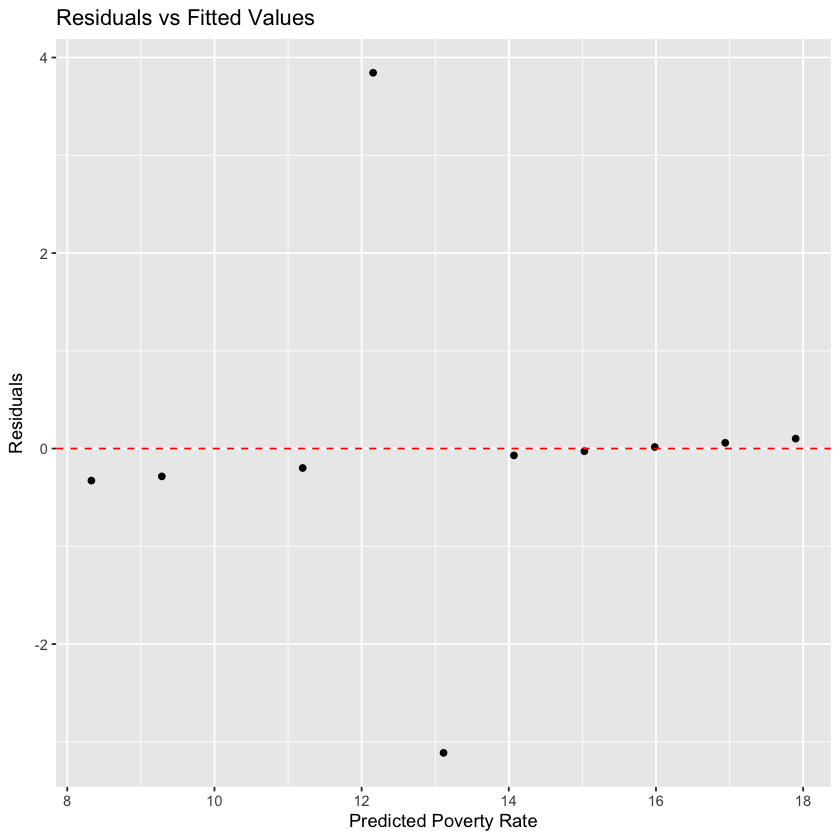

In [120]:
# Residuals vs Fitted plot
ggplot(model_aug, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Predicted Poverty Rate",
       y = "Residuals")

#goal= to assess linearity and equal variance (homoscedasticity)
#What to look for:

#Red line should be approximately horizontal at y=0

#Points should be randomly scattered without patterns

#No funnel-shaped distributions (indicates heteroscedasticity)

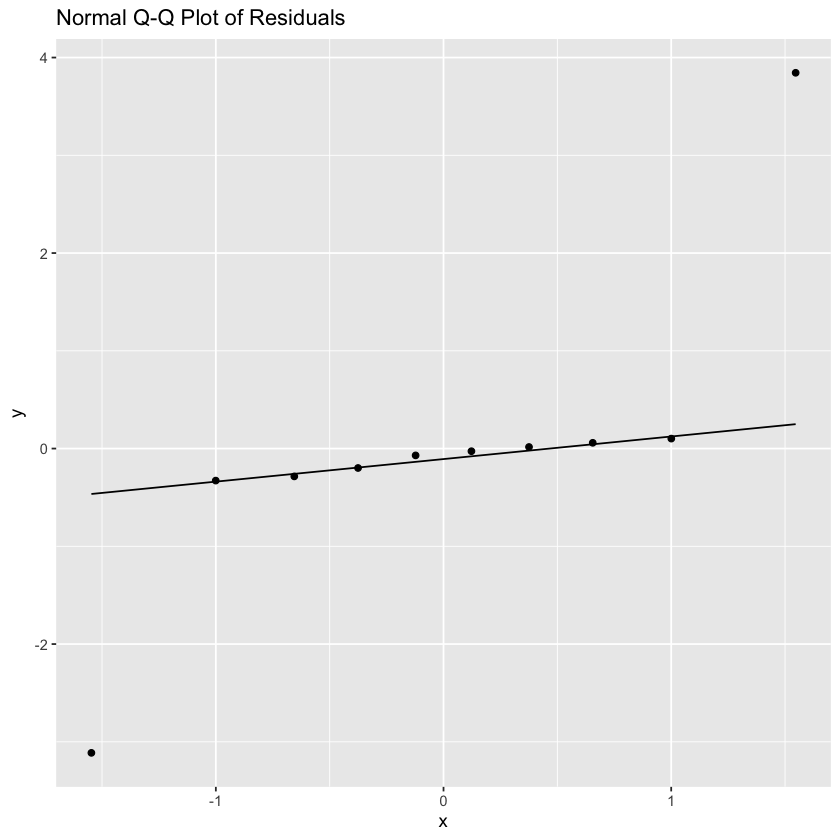

In [113]:
# Q-Q plot for normality check
ggplot(model_aug, aes(sample = .resid)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Normal Q-Q Plot of Residuals")

# EXPLANATION:
#Normal Q-Q Plot – to assess whether residuals are normally distributed

#What to look for:

#Points should closely follow the dashed 45° line

#Deviations at ends indicate non-normality

#S-shaped curves suggest skewness

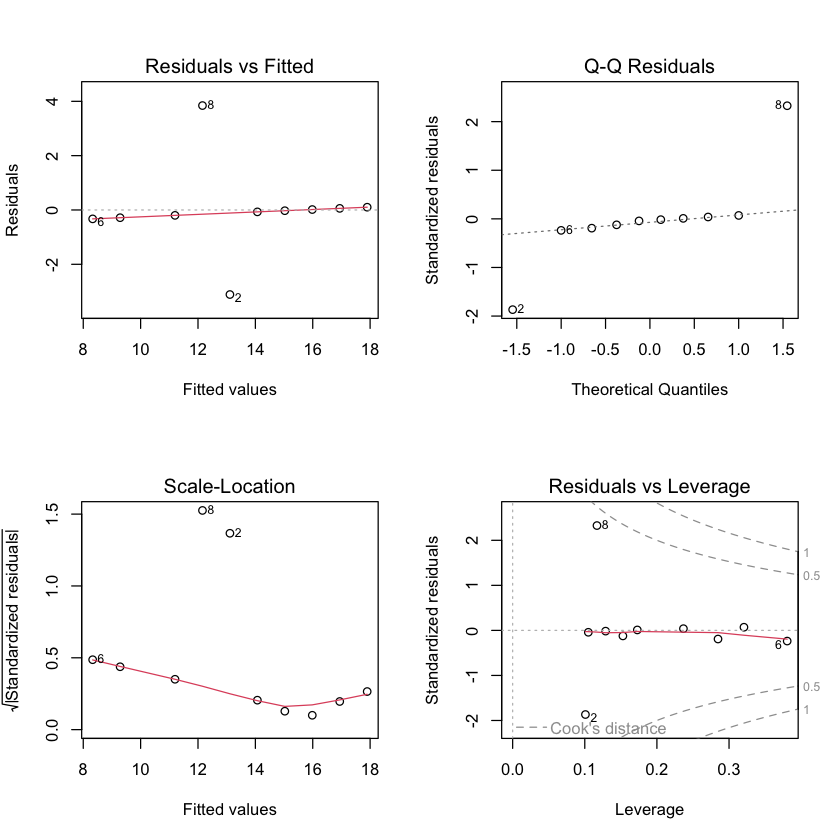

In [122]:
# Create diagnostic plots
par(mfrow = c(2, 2))  # Set up 2x2 grid for plots
plot(model)

# Scale-Location Plot: Checks homoscedasticity (constant variance)
#Residuals vs Leverage: Identifies influential points


In [123]:
### PREDICTION AND EXTRAPOLATION ##########################

In [127]:
# Make predictions for specific HS grad rates 
new_data <- data.frame(hs_grad = c(85, 90, 95))
predictions <- predict(model, newdata = new_data)

# We are predicting poverty rates based on 3 specific high school graduation rates: 85%, 90%, and 95%.
#This of course based on our earlier regression equation.


In [128]:
predictions

1         2         3 
13.112887  8.327672  3.542458

Explanation:
	•	A state with 85% high school graduation rate is expected to have a 13.11% poverty rate.
	•	A state with 90% graduation is predicted to have a lower poverty rate of 8.33%.
	•	A state with 95% graduation is predicted to have an even lower 3.54% poverty rate.

`geom_smooth()` using formula = 'y ~ x'


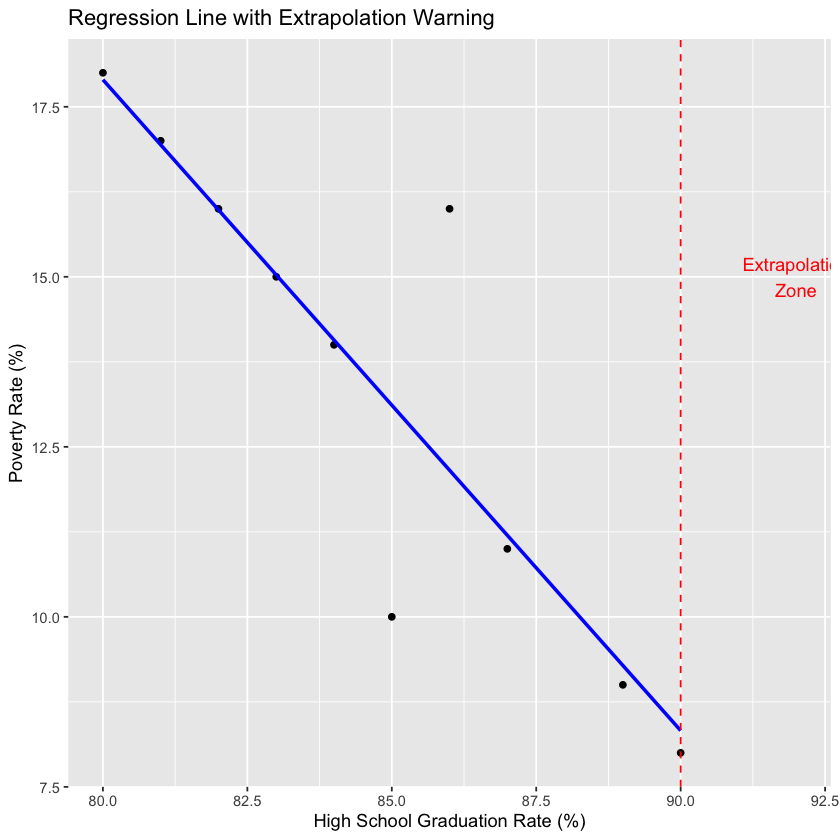

In [129]:
# Create prediction plot with regression line
ggplot(education_data, aes(x = hs_grad, y = poverty)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  geom_vline(xintercept = max(education_data$hs_grad), 
             linetype = "dashed", color = "red") +
  annotate("text", x = 92, y = 15, 
           label = "Extrapolation\nZone", color = "red") +
  labs(title = "Regression Line with Extrapolation Warning",
       x = "High School Graduation Rate (%)",
       y = "Poverty Rate (%)")

In [ ]:
# EXPLANATION:
# - predict() generates predictions for new values
# - The plot shows the danger of extrapolation 
# - The red dashed line marks the boundary of observed data

Next week, we’ll dive deeper into regression, focusing on confidence intervals, prediction intervals, and other related topics (lectures 7 and 8).
